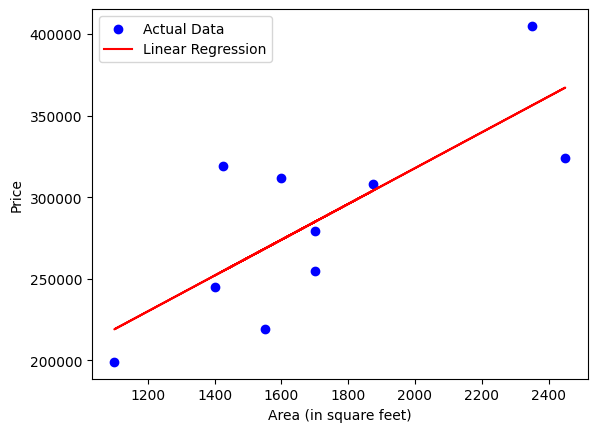

Predicted price for a 1800 sq. ft. area: 295830.2577155584


In [20]:
# Linear Regression Single Variable - Example 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some sample data (area and price)
area = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])  # Independent variable
price = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])  # Dependent variable

# Reshape the data (required for scikit-learn)
area = area.reshape(-1, 1)
price = price.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(area, price)

# Make predictions
predicted_price = model.predict(area)

# Visualize the results
plt.scatter(area, price, color='blue', label='Actual Data')
plt.plot(area, predicted_price, color='red', label='Linear Regression')
plt.xlabel('Area (in square feet)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predict the price of a new area
new_area = np.array([[1800]])  # Area to predict the price for
predicted_new_price = model.predict(new_area)
print("Predicted price for a 1800 sq. ft. area:", predicted_new_price[0][0])



c:\Users\MahendraVishnuPrabha\.conda\envs\my_python\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

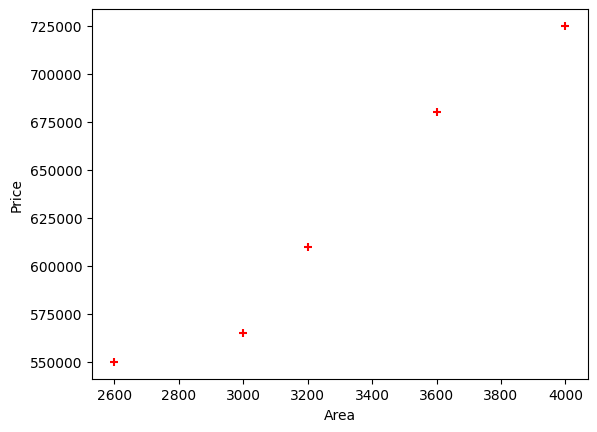

In [32]:
# Linear Regression Single Variable - Example 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Homeprice.csv')
df

plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price,color='red',marker='+')

# reg = linear_model.LinearRegression()
# reg.fit(df[['Area']], df.Price)

new_df = df.drop('Price',axis='columns')
new_df

Price = df.Price
Price

reg = linear_model.LinearRegression()
reg.fit(new_df,Price)

reg.predict([[5000]])


In [40]:
# Linear Regression Multiple Variables

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Housep.csv')
df

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']],df.price)

reg.predict([[3000, 3, 40]])

c:\Users\MahendraVishnuPrabha\.conda\envs\my_python\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([498408.25158031])

In [42]:
# Gradient Descent and Cost Function

import numpy as np


def grad_des(x,y):
    m_cur = b_cur = 0
    iterations = 1000
    n = len(x)
    learn_rate = 0.001

    for i in range(iterations):
        y_pred = m_cur * x + b_cur
        cost = (1/n) * sum([val**2 for val in (y - y_pred)])
        md = -(2/n) * sum(x * (y - y_pred))
        bd = -(2/n) * sum((y - y_pred))
        m_cur = m_cur - learn_rate * md
        b_cur = b_cur  - learn_rate * bd
        print('m {}, b {}, cost {}, iteration {}'.format(m_cur, b_cur, cost, i))


x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

grad_des(x, y)

m 0.062, b 0.018000000000000002, cost 89.0, iteration 0
m 0.122528, b 0.035592000000000006, cost 84.881304, iteration 1
m 0.181618832, b 0.052785648000000004, cost 80.955185108544, iteration 2
m 0.239306503808, b 0.069590363712, cost 77.21263768455901, iteration 3
m 0.29562421854195203, b 0.086015343961728, cost 73.64507722605434, iteration 4
m 0.35060439367025875, b 0.10206956796255283, cost 70.2443206760065, iteration 5
m 0.40427867960173774, b 0.11776180246460617, cost 67.00256764921804, iteration 6
m 0.4566779778357119, b 0.13310060678206653, cost 63.912382537082294, iteration 7
m 0.5078324586826338, b 0.14809433770148814, cost 60.966677449199324, iteration 8
m 0.5577715785654069, b 0.16275115427398937, cost 58.15869595270883, iteration 9
m 0.606524096911324, b 0.17707902249404894, cost 55.481997572035766, iteration 10
m 0.6541180926443106, b 0.1910857198675929, cost 52.9304430134884, iteration 11
m 0.7005809802869303, b 0.20477883987199186, cost 50.49818008081245, iteration 12
m 0

In [54]:
# Dummy Variables & One Hot Encoding

import pandas as pd

df = pd.read_csv("Houseprice.csv")
df

dummies = pd.get_dummies(df.town)
dummies

merged = pd.concat([df,dummies],axis='columns')
merged

final = merged.drop(['town'], axis='columns')
final

final = final.drop(['west windsor'], axis='columns')
final

X = final.drop('price', axis='columns')
X

y = final.price

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X,y)

model.predict([[3400,0,0]])

model.score(X,y)

c:\Users\MahendraVishnuPrabha\.conda\envs\my_python\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


0.9573929037221873

In [62]:
# # Dummy Variables & One Hot Encoding - Using sklearn OneHotEncoder

import pandas as pd

df = pd.read_csv("Houseprice.csv")
df

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

X = dfle[['town','area']].values
X

y = dfle.price.values
y

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

X = ct.fit_transform(X)
X
X = X[:,1:]

X

model.fit(X,y)

model.predict([[0,1,3400]])

array([681241.6684584])

0.8819740618117469

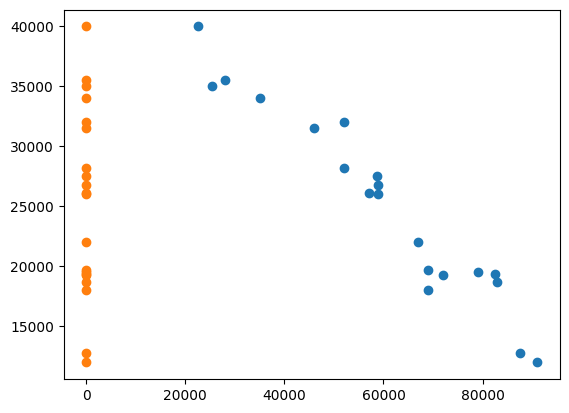

In [71]:
# Training and Testing Data Split

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Carprice.csv")
df


%matplotlib inline
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

X = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

#  To keep the values of x_train the same after every execution add random state = 10 in the above syntax 
X_train

X_test

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

clf.predict(X_test)

clf.score(X_test, y_test)

1.0

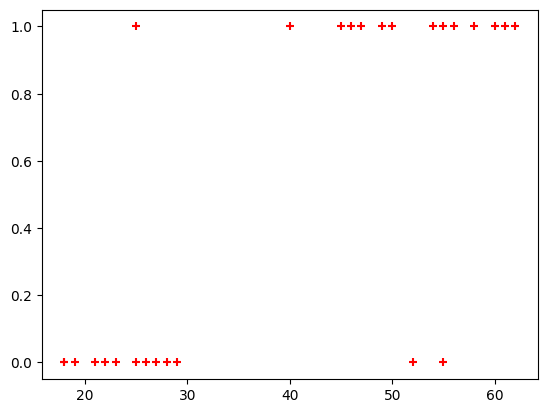

In [88]:
# Logistic Regression (Binary Classification)

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("Ins_Data.csv")
df

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)
X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

model.predict(X_test)

model.score(X_test,y_test)

In [96]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


c:\Users\MahendraVishnuPrabha\.conda\envs\my_python\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(95.72222222222221, 0.5, 'Truth')

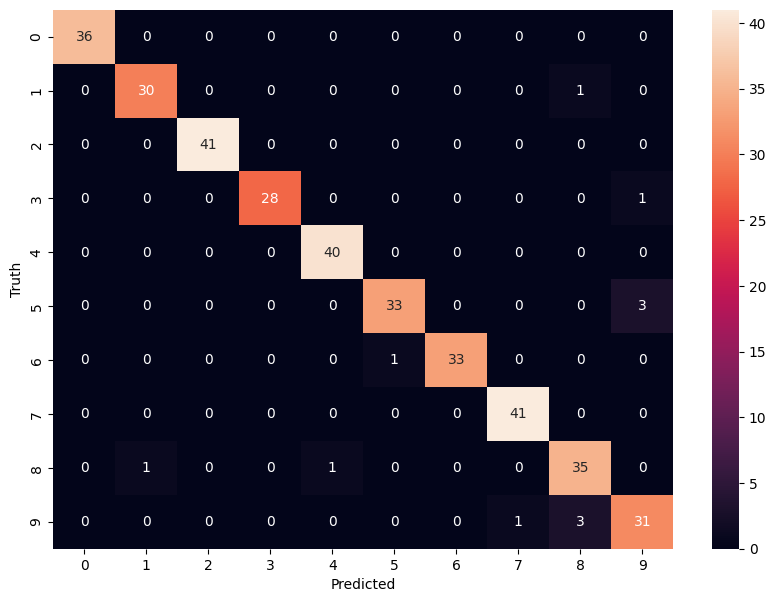

In [1]:
#  Logistic Regression (Multiclass Classification)

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

# plt.gray() 
# for i in range(5):
#     plt.matshow(digits.images[i])
    
digits.data[0]

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

model.fit(X_train, y_train)

model.score(X_test, y_test)

model.predict(digits.data[0:5])

y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [6]:
# Decision Tree

import pandas as pd

df = pd.read_csv("Salaries.csv")
df.head()

inputs = df.drop('salary_more_then_100k',axis='columns')

target = df['salary_more_then_100k']

from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs

inputs_n = inputs.drop(['company','job','degree'],axis='columns')

inputs_n

target

from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(inputs_n, target)

model.score(inputs_n,target)

model.predict([[2,1,0]])

c:\Users\MahendraVishnuPrabha\.conda\envs\my_python\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)

c:\Users\MahendraVishnuPrabha\.conda\envs\my_python\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


0.9666666666666667

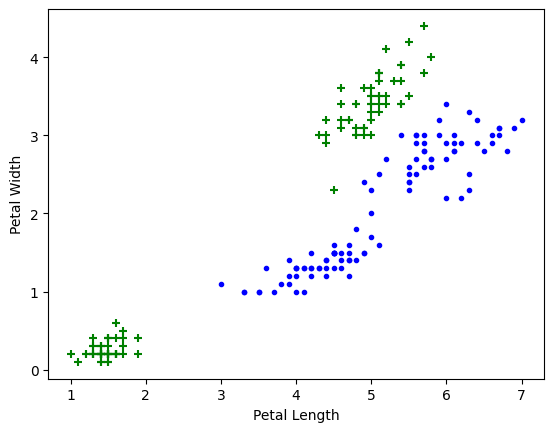

In [27]:
# Support Vector Machine (SVM)

import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Iris = load_iris()

iris.feature_names

iris.target_names

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

df['target'] = iris.target
df.head()

df[df.target==1].head()

df[df.target==2].head()

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

df[45:55]

df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

# Sepal length vs Sepal Width (Setosa vs Versicolor)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

# Petal length vs Pepal Width (Setosa vs Versicolor)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

X = df.drop(['target','flower_name'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

model.score(X_test, y_test)

model.predict([[4.8,3.0,1.5,0.3]])


# Tune parameters

# 1. Regularization (C)

model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

# 2. Gamma

model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

# 3. Kernel

model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

model_linear_kernal.score(X_test, y_test)

Text(95.72222222222221, 0.5, 'Truth')

<Figure size 640x480 with 0 Axes>

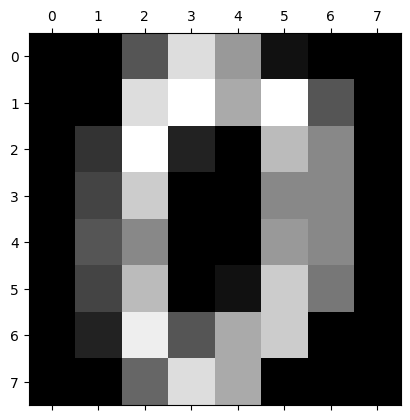

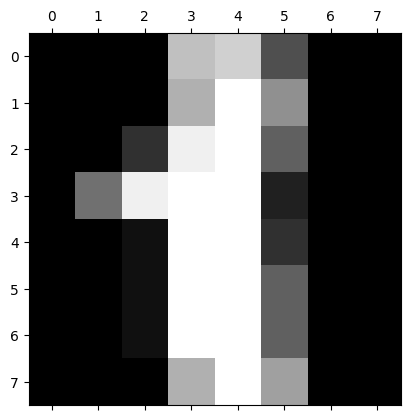

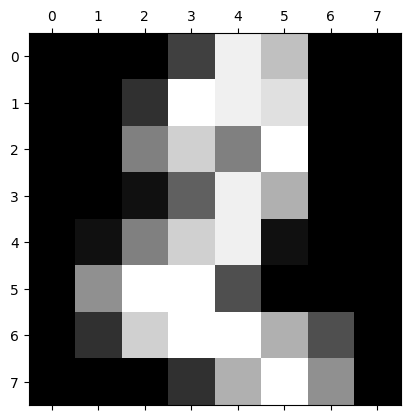

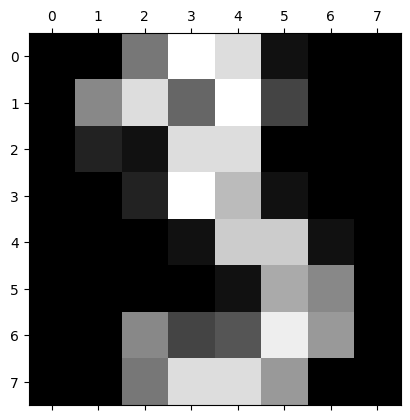

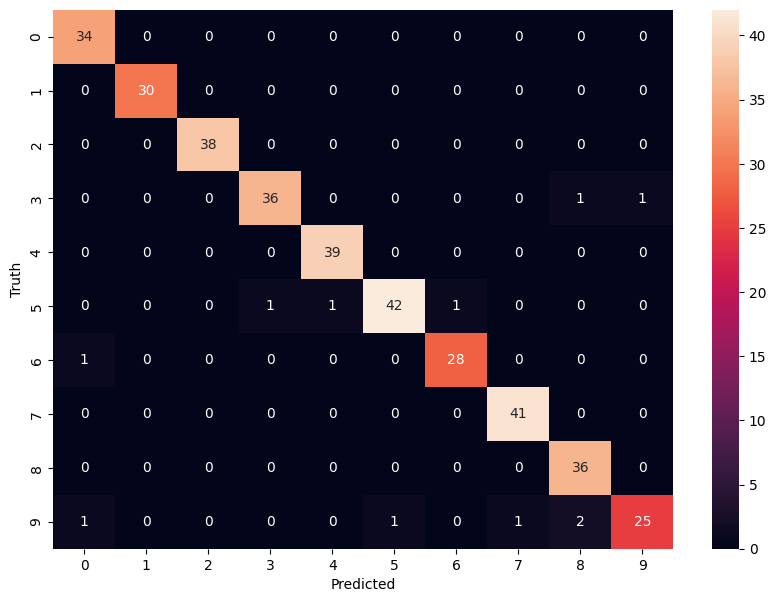

In [28]:
# Random Forest

# Digits dataset from sklearn

import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

dir(digits)

plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

df = pd.DataFrame(digits.data)
df.head()

df['target'] = digits.target

X = df.drop('target',axis='columns')
y = df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

model.score(X_test, y_test)

y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
# K Fold Cross Validation

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


digits = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

# Logistic Regression

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

# SVM

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

# Random Forest

rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

# KFold cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

# Use KFold for our digits example

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))


scores_logistic

scores_svm

scores_rf

# cross_val_score function

from sklearn.model_selection import cross_val_score

# Logistic regression model performance using cross_val_score

cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

# svm model performance using cross_val_score

cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

# random forest performance using cross_val_score

cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

# Parameter tunning using k fold cross validation

scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)



[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


0.9521508379888267

In [ ]:
# Machine Learning is classified into 3 types:

# 1. Supervised - where in the given dataset you have the target variable present as in you know what is the final product.

# 2. Unsupervised - in this you only have is set of features, you dont know about your target variable. 
#                   using this dataset we try to identify the underlined structure in that data to make predictions.
#                   K-means is example for unsupervised class. 

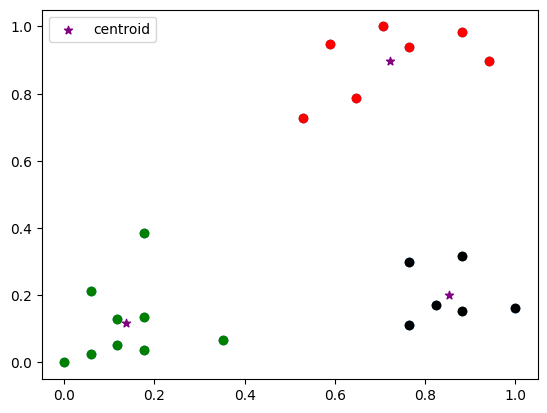

In [45]:
# K Means Clustering Algorithm

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df = pd.read_csv("Income.csv")
df.head()

# plt.scatter(df.Age,df['Income($)'])
# plt.xlabel('Age')
# plt.ylabel('Income($)')

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

df['cluster']=y_predicted
df.head()

km.cluster_centers_

# df1 = df[df.cluster==0]
# df2 = df[df.cluster==1]
# df3 = df[df.cluster==2]

# plt.scatter(df1.Age,df1['Income($)'],color='green')
# plt.scatter(df2.Age,df2['Income($)'],color='red')
# plt.scatter(df3.Age,df3['Income($)'],color='black')

# # This is line shows the centroid 
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

# plt.xlabel('Age')
# plt.ylabel('Income ($)')
# plt.legend()


# Preprocessing using min max scaler

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


df.head()

plt.scatter(df.Age,df['Income($)'])

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

df['cluster']=y_predicted
df.head()

km.cluster_centers_


df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()

# Elbow Plot

# sse = []
# k_rng = range(1,10)
# for k in k_rng:
#     km = KMeans(n_clusters=k)
#     km.fit(df[['Age','Income($)']])
#     sse.append(km.inertia_)

# plt.xlabel('K')
# plt.ylabel('Sum of squared error')
# plt.plot(k_rng,sse)